### Data science Nano Degree Course 2 Project

### Using the 2025 StackOverflow Developer Survey data this notebook presents the method followed to analyse the survey results to gain insights into where best it might be to be a developer! Both in terms of geographic location and industry, through answering the following questions,  

1. Where are respondents from? Both interms of Country and Industry.  
2. Is there a link between Compensation (Salary) and Job Satisfaction? What might that look like?
3. Which countries have the highest paid and most satisfied developers?   
4. Which Industry has the highest paid and most satisfied developers?

#### Additionally, we seek to understand if the use of AI in development has any effect on compensation and job satisfaction.   

#### Lastly, what should a developer be earning? I make an attempt at predicting developer salaries based on a subset of the survey features


In [1]:
# import necessary Python libraries to perform analysis and visualise results
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read in the data
import os
inputData = os.path.join('data','survey_results_public.zip') 

df_survey_results = pd.read_csv(inputData, compression='zip')

In [4]:
#check data attributes
print(df_survey_results.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49123 entries, 0 to 49122
Data columns (total 170 columns):
 #    Column                                    Dtype  
---   ------                                    -----  
 0    ResponseId                                int64  
 1    MainBranch                                object 
 2    Age                                       object 
 3    EdLevel                                   object 
 4    Employment                                object 
 5    EmploymentAddl                            object 
 6    WorkExp                                   float64
 7    LearnCodeChoose                           object 
 8    LearnCode                                 object 
 9    LearnCodeAI                               object 
 10   AILearnHow                                object 
 11   YearsCode                                 float64
 12   DevType                                   object 
 13   OrgSize                                   ob

It is noted that many features are text based and would need some sort of mapping/encoding to numerical values should they form part of independt variables for prediction

For prediction purposed the Target variable would be 'ConvertedCompYearly'

In [5]:
# ensure feature names do not contain trailing or leading spaces and change any spaces to underscores
df_survey_results.columns = df_survey_results.columns.str.strip().str.replace(' ','_')

In [6]:
# get an initial view of the data
df_survey_results.head(5)

,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,AILearnHow,YearsCode,DevType,OrgSize,ICorPM,RemoteWork,PurchaseInfluence,TechEndorseIntro,TechEndorse_1,TechEndorse_2,TechEndorse_3,TechEndorse_4,TechEndorse_5,TechEndorse_6,TechEndorse_7,TechEndorse_8,TechEndorse_9,TechEndorse_13,TechEndorse_13_TEXT,TechOppose_1,TechOppose_2,TechOppose_3,TechOppose_5,TechOppose_7,TechOppose_9,TechOppose_11,TechOppose_13,TechOppose_16,TechOppose_15,TechOppose_15_TEXT,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSatPoints_13,JobSatPoints_14,JobSatPoints_15,JobSatPoints_16,JobSatPoints_15_TEXT,AIThreat,NewRole,ToolCountWork,ToolCountPersonal,Country,Currency,CompTotal,LanguageChoice,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,LanguagesHaveEntry,LanguagesWantEntry,DatabaseChoice,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,DatabaseHaveEntry,DatabaseWantEntry,PlatformChoice,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,PlatformHaveEntry,PlatformWantEntry,WebframeChoice,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,WebframeHaveEntry,WebframeWantEntry,DevEnvsChoice,DevEnvsHaveWorkedWith,DevEnvsWantToWorkWith,DevEnvsAdmired,DevEnvHaveEntry,DevEnvWantEntry,SOTagsHaveWorkedWith,SOTagsWantToWorkWith,SOTagsAdmired,SOTagsHaveEntry,SOTagsWant_Entry,OpSysPersonal_use,OpSysProfessional_use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackHaveEntry,OfficeStackWantEntry,CommPlatformHaveWorkedWith,CommPlatformWantToWorkWith,CommPlatformAdmired,CommPlatformHaveEntr,CommPlatformWantEntr,AIModelsChoice,AIModelsHaveWorkedWith,AIModelsWantToWorkWith,AIModelsAdmired,AIModelsHaveEntry,AIModelsWantEntry,SOAccount,SOVisitFreq,SODuration,SOPartFreq,SO_Dev_Content,SO_Actions_1,SO_Actions_16,SO_Actions_3,SO_Actions_4,SO_Actions_5,SO_Actions_6,SO_Actions_9,SO_Actions_7,SO_Actions_10,SO_Actions_15,SO_Actions_15_TEXT,SOComm,SOFriction,AISelect,AISent,AIAcc,AIComplex,AIToolCurrently_partially_AI,AIToolDon't_plan_to_use_AI_for_this_task,AIToolPlan_to_partially_use_AI,AIToolPlan_to_mostly_use_AI,AIToolCurrently_mostly_AI,AIFrustration,AIExplain,AIAgents,AIAgentChange,AIAgent_Uses,AgentUsesGeneral,AIAgentImpactSomewhat_agree,AIAgentImpactNeutral,AIAgentImpactSomewhat_disagree,AIAgentImpactStrongly_agree,AIAgentImpactStrongly_disagree,AIAgentChallengesNeutral,AIAgentChallengesSomewhat_disagree,AIAgentChallengesStrongly_agree,AIAgentChallengesSomewhat_agree,AIAgentChallengesStrongly_disagree,AIAgentKnowledge,AIAgentKnowWrite,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",AI CodeGen tools or AI-enabled apps,14.0,"Developer, mobile",20 to 99 employees,People manager,Remote,"Yes, I influenced the purchase of a substantia...",Work,10.0,7.0,9.0,6.0,3.0,11.0,12.0,1.0,8.0,14.0,NaN,15.0,7.0,8.0,12.0,11.0,1.0,6.0,13.0,3.0,16.0,NaN,Fintech,3.0,9.0,5.0,10.0,12.0,11.0,2.0,6.0,7.0,13.0,14.0,15.0,8.0,NaN,I'm not sure,I have neither consider or transitioned into a...,7.0,3.0,Ukraine,EUR European Euro,52800.0,Yes,Bash/Shell (all shells);Dart;SQL,Dart,Dart,NaN,NaN,Yes,Cloud Firestore;PostgreSQL,NaN,NaN,NaN,NaN,Yes,Amazon Web Services (AWS);Cloudflare;Firebase;...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,Yes,Android Studio;Notepad++;Visual Studio;Visual ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Windows;MacOS;Android,Windows;MacOS;Android;iOS;iPadOS,Confluence;GitHub;GitLab;Jira;Markdown File,Markdown File,Markdown File,Na

To answer my queries and provide the insghts, in an efficient manner we will work with features that are more applicable to our analysis, namely:

Age, EdLevel, WorkExp, YearsCode, DevType, Industry, Country, AISelect, JobSat and ConvertedCompYearly

In [7]:
# get columns of interest to answer my questions
cols = ['ResponseId','Age', 'EdLevel', 'WorkExp', 'YearsCode', 'DevType', 'Industry', 'Country', 'AIModelsHaveWorkedWith', 'AISelect', 'ConvertedCompYearly', 'JobSat']

df_main = df_survey_results[cols]
df_main.head(5)

,ResponseId,Age,EdLevel,WorkExp,YearsCode,DevType,Industry,Country,AIModelsHaveWorkedWith,AISelect,ConvertedCompYearly,JobSat
0,1,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",8.0,14.0,"Developer, mobile",Fintech,Ukraine,openAI GPT (chatbot models);openAI Image gener...,"Yes, I use AI tools monthly or infrequently",61256.0,10.0
1,2,25-34 years old,"Associate degree (A.A., A.S., etc.)",2.0,10.0,"Developer, back-end",Retail and Consumer Services,Netherlands,openAI GPT (chatbot models),"Yes, I use AI tools weekly",104413.0,9.0
2,3,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10.0,12.0,"Developer, front-end",Software Development,Ukraine,Gemini (Flash general purpose models);openAI G...,"Yes, I use AI tools daily",53061.0,8.0
3,4,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4.0,5.0,"Developer, back-end",Retail and Consumer Services,Ukraine,NaN,"Yes, I use AI tools weekly",36197.0,6.0
4,5,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",21.0,22.0,Engineering manager,Software Development,Ukraine,openAI GPT (chatbot models),"Yes, I use AI tools weekly",60000.0,7.0


Now some basic checks on the data are performed to ensure no duplicates, infinite values, check for NaN's or missing data etc...   
It is noted there are numerous NaN values - these will be dealt with by dropping such records, provided the remaining sample is large enough to continue analysis or prediction

In [8]:
# check for duplicate entries (rows)
df_main[df_main.duplicated()]

,ResponseId,Age,EdLevel,WorkExp,YearsCode,DevType,Industry,Country,AIModelsHaveWorkedWith,AISelect,ConvertedCompYearly,JobSat


In [9]:
# check for count of NaN's per feature
df_main.isna().sum()

ResponseId                    0
Age                           0
EdLevel                    1036
WorkExp                    6279
YearsCode                  6123
DevType                    5487
Industry                  15516
Country                   13721
AIModelsHaveWorkedWith    32862
AISelect                  15437
ConvertedCompYearly       25195
JobSat                    22480
dtype: int64

In [10]:
# check for 'infinite' values
print(df_main.isin([np.inf, -np.inf]).sum())

ResponseId                0
Age                       0
EdLevel                   0
WorkExp                   0
YearsCode                 0
DevType                   0
Industry                  0
Country                   0
AIModelsHaveWorkedWith    0
AISelect                  0
ConvertedCompYearly       0
JobSat                    0
dtype: int64


For the first part of the analysis we are interested in whch countries are good to be a developer in, therefore we should understand the volume and proportion of responses per country.   

In [11]:
# check number and proportion of unique values for Countries
print(df_main['Country'].value_counts())

Country
United States of America                                7226
Germany                                                 3022
India                                                   2542
United Kingdom of Great Britain and Northern Ireland    2038
France                                                  1409
Canada                                                  1303
Ukraine                                                  964
Poland                                                   887
Netherlands                                              867
Italy                                                    834
Brazil                                                   824
Australia                                                803
Spain                                                    717
Sweden                                                   616
Switzerland                                              546
Czech Republic                                           520
Austria         

In [12]:
# get proportion of Country values separating top_20 and others
country_proportions = df_main['Country'].value_counts(normalize=True)

country_top_20 = country_proportions.head(20) # top 20 countries proportion
country_others = country_proportions.iloc[20:].sum() # proportion of the rest of the countries

# create a new serries for plotting
plot_data = country_top_20.copy()

if country_others >0:
    plot_data['Others'] = country_others



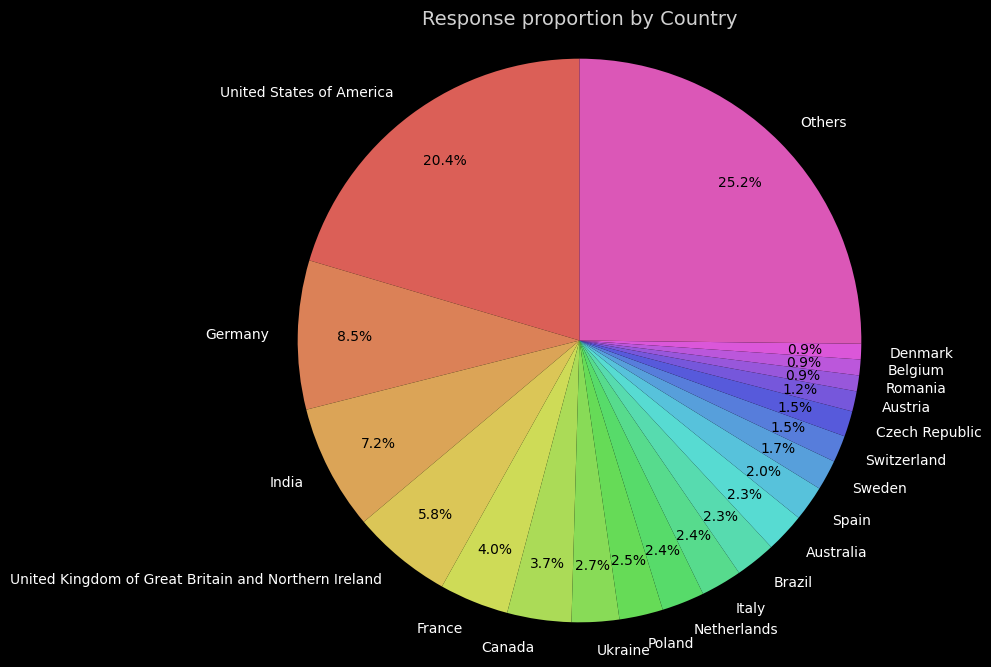

In [13]:
# Pie chart of Proportion of responses from Countries

fig, ax = plt.subplots(figsize=(8,8), facecolor='black')
ax.set_facecolor('black')

wedges, texts, autotexts = ax.pie(plot_data, autopct='%1.1f%%', startangle=90, labels=plot_data.index, colors=sns.color_palette('hls',23),pctdistance=0.8)

for text in texts:
   text.set_color('white')

ax.set_title('Response proportion by Country', color="#D1D1D1", fontsize=14)
ax.axis('equal')

plt.show()

It is clear that the proportion of responses already drops to below 1% for the 18'th, 19'th and 20'th country within the Top20 countries by response volume. Therefore analysis will foucs on these 'Top20' highest response volume countries.

Next we would like to understand response volumes/proportion per Industry

In [14]:
# check counts for Industry
print(df_main['Industry'].value_counts())
print()
print(df_main['Industry'].value_counts(normalize=True))
industry_plot_data = df_main['Industry'].value_counts(normalize=True)
industry_plot_data.rename(index={'Other:': 'Others'}, inplace=True)

Industry
Software Development                          16267
Other:                                         2666
Internet, Telecomm or Information Services     1697
Fintech                                        1685
Banking/Financial Services                     1433
Healthcare                                     1394
Manufacturing                                  1314
Government                                     1183
Higher Education                               1165
Retail and Consumer Services                   1053
Transportation, or Supply Chain                 910
Computer Systems Design and Services            894
Media & Advertising Services                    773
Energy                                          740
Insurance                                       433
Name: count, dtype: int64

Industry
Software Development                          0.484036
Other:                                        0.079329
Internet, Telecomm or Information Services    0.050495
Fintech   

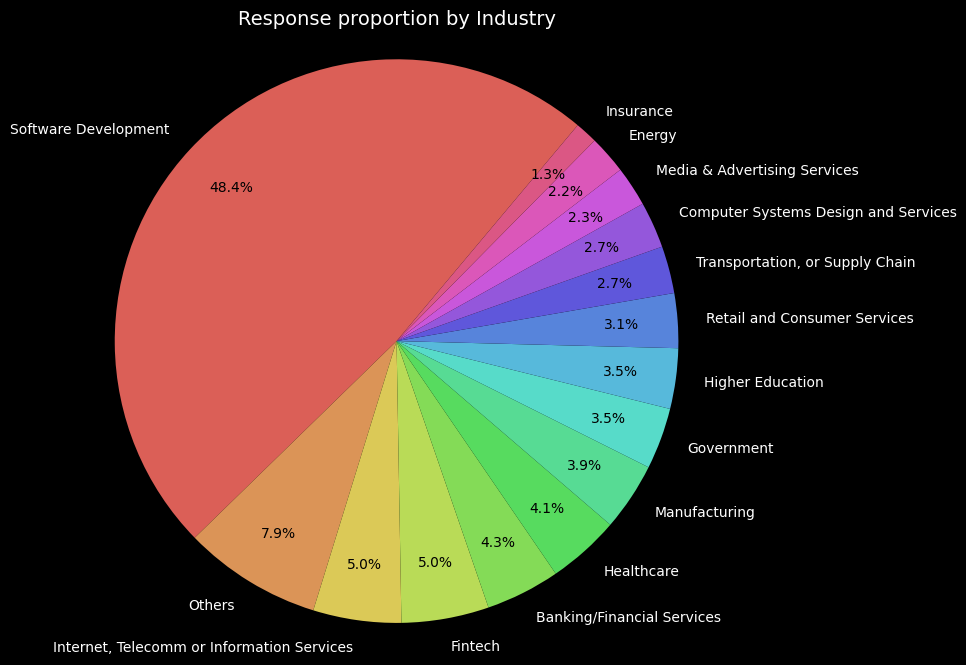

In [15]:
# plot pie of proportion of responses by Industry

fig, ax = plt.subplots(figsize=(8,8), facecolor='black')
ax.set_facecolor('black')

wedges, texts, autotexts = ax.pie(industry_plot_data, autopct='%1.1f%%', startangle=50, labels=industry_plot_data.index, colors=sns.color_palette('hls', 15), pctdistance=0.8)

for text in texts:
    text.set_color('white')

ax.set_title('Response proportion by Industry', color='white', fontsize=14)
ax.axis('equal')

plt.show()

With only 15 Industry categories we maintain a view accross all. Notably 'Software Development' is the industry where vast majority of responses came from.

In [16]:
# pay vs job satisfaction - get the 2 fields of interest and check for NaN's
df_Comp_JobSat = df_main[['ConvertedCompYearly', 'JobSat']]
df_Comp_JobSat.isna().sum()

ConvertedCompYearly    25195
JobSat                 22480
dtype: int64

In [17]:
# remove NaNs from compensation and job satisfaction
df_Comp_JobSat.dropna(axis=0, inplace=True)

print(df_Comp_JobSat.isna().sum())
print(len(df_Comp_JobSat))

ConvertedCompYearly    0
JobSat                 0
dtype: int64
19439


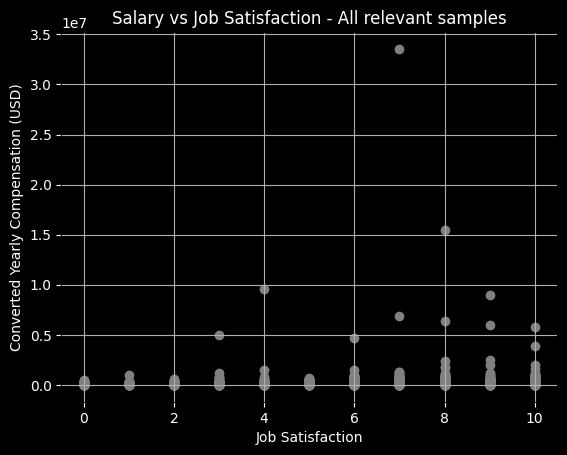

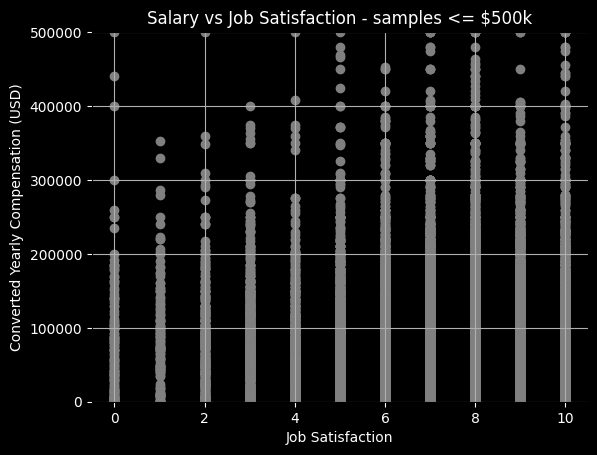

In [18]:
# scatter of salary vs job satisfaction

plt.figure(facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

plt.scatter(x= df_Comp_JobSat['JobSat'],y=df_Comp_JobSat['ConvertedCompYearly'], color='gray')

plt.xlabel('Job Satisfaction', color='white')
plt.ylabel('Converted Yearly Compensation (USD)', color='white')
plt.title('Salary vs Job Satisfaction - All relevant samples', color='white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.grid(True)
plt.show()

print('\n\n')

# plot for compensation of $500k pa and below
plt.figure(facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

plt.scatter(x=df_Comp_JobSat['JobSat'], y=df_Comp_JobSat['ConvertedCompYearly'], color='gray')
plt.ylim(0, 500000)

plt.xlabel('Job Satisfaction', color='white')
plt.ylabel('Converted Yearly Compensation (USD)', color='white')
plt.title('Salary vs Job Satisfaction - samples <= $500k', color='white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.grid(True)

plt.show()

Looking at Compensation/Salary vs Job Satisfaction accross the samples it would initially appear that, as one might expect, there is some correlation - ie: as salary increases so does job satisfaction. However those really are mostly outlier samples.   

Zooming into Compensation/Salaries below $500k it gets abit more interesting. From ~$200k and below it appears there is no real corelation between compensation and job satisfaction - many people at that pay level say they are very unsatisfied, while many others far below are very satisfied apparently! Its really only from about $250k pa and up that we start to see the trend one might expect. 

In [19]:
# Now lets understand what Compensation and Job Satisfaction look like per country

# get the three respective features and check for NaNs
df_Country_Comp_JobSat = df_main[['Country', 'ConvertedCompYearly', 'JobSat']]
df_Country_Comp_JobSat.isna().sum()


Country                13721
ConvertedCompYearly    25195
JobSat                 22480
dtype: int64

In [20]:
# drop the NaNs and cehck remaining sample size
df_Country_Comp_JobSat.dropna(inplace=True)
len(df_Country_Comp_JobSat)

19439

In [21]:
# get mean compensation and job satisfaction per country

df_Country_Comp_JobSat_mean = df_Country_Comp_JobSat.groupby('Country')[['ConvertedCompYearly', 'JobSat']].mean().reset_index()
df_Country_Comp_JobSat_mean.head(10)


,Country,ConvertedCompYearly,JobSat
0,Afghanistan,16265.200000,6.800000
1,Albania,51332.875000,7.000000
2,Algeria,20717.181818,7.181818
3,Andorra,145018.333333,7.666667
4,Angola,199743.000000,5.333333
5,Antigua and Barbuda,1.000000,8.000000
6,Argentina,48839.007576,7.257576
7,Armenia,25016.363636,7.090909
8,Australia,120772.619658,7.348291
9,Austria,79963.660793,7.079295


In [22]:
# some of the above do not look realistic, especially in terms of compensation field, and indeed we have a very low number of samples from some countries...  so lets change tact abit 
# and get all samples from top 20 countries by number of responses, then get mean job satisfaction and commpensation per country
top_20_countries = country_top_20.index.values

df_Country_Comp_JobSat_top20 = df_Country_Comp_JobSat[df_Country_Comp_JobSat['Country'].isin(top_20_countries)].reset_index()
df_Country_Comp_JobSat_top20.drop('index', axis=1, inplace=True)

len(df_Country_Comp_JobSat_top20)

14944

In [23]:
# lets get mean compensation and job satisfaction per country for the top 20 countries

df_Country_Comp_JobSat_top20_mean = df_Country_Comp_JobSat_top20.groupby('Country')[['ConvertedCompYearly', 'JobSat']].mean().reset_index()
df_Country_Comp_JobSat_top20_mean.head(20)

,Country,ConvertedCompYearly,JobSat
0,Australia,120772.619658,7.348291
1,Austria,79963.660793,7.079295
2,Belgium,83284.400000,7.377778
3,Brazil,56229.568182,7.390152
4,Canada,102570.043767,7.360743
5,Czech Republic,71476.130000,7.233333
6,Denmark,110019.288660,7.396907
7,France,74984.065805,7.136310
8,Germany,86688.961381,6.966647
9,India,46995.226310,6.984392


In [24]:
# helper funtion to calculate z-score normalisation (which is the same as StandardScalar())
def z_score(x):
    return (x - x.mean()) / x.std()

# z-score for salary and job satisfaction grouped by Country
# z-score normalisation - a z value shows the number of standard deviations a given data point lies above or below the mean (the mean being 0)
# (z-score standardisation sets the mean to 0 and standard deviation to 1)


# normalise/standardise the compensation and job satisfaction to understand standard deviation per country based on top 20 countries by response volume
df_Country_Comp_JobSat_top20_mean['comp_z_score'] = df_Country_Comp_JobSat_top20_mean['ConvertedCompYearly'].transform(z_score)
df_Country_Comp_JobSat_top20_mean['jobsat_z_score'] = df_Country_Comp_JobSat_top20_mean['JobSat'].transform(z_score)

df_Country_Comp_JobSat_top20_mean

,Country,ConvertedCompYearly,JobSat,comp_z_score,jobsat_z_score
0,Australia,120772.619658,7.348291,0.923687,0.880522
1,Austria,79963.660793,7.079295,-0.336731,-0.821812
2,Belgium,83284.400000,7.377778,-0.234167,1.067131
3,Brazil,56229.568182,7.390152,-1.069778,1.145438
4,Canada,102570.043767,7.360743,0.361485,0.959325
5,Czech Republic,71476.130000,7.233333,-0.598875,0.153016
6,Denmark,110019.288660,7.396907,0.591561,1.188191
7,France,74984.065805,7.136310,-0.490530,-0.460993
8,Germany,86688.961381,6.966647,-0.129015,-1.534704
9,India,46995.226310,6.984392,-1.354988,-1.422403


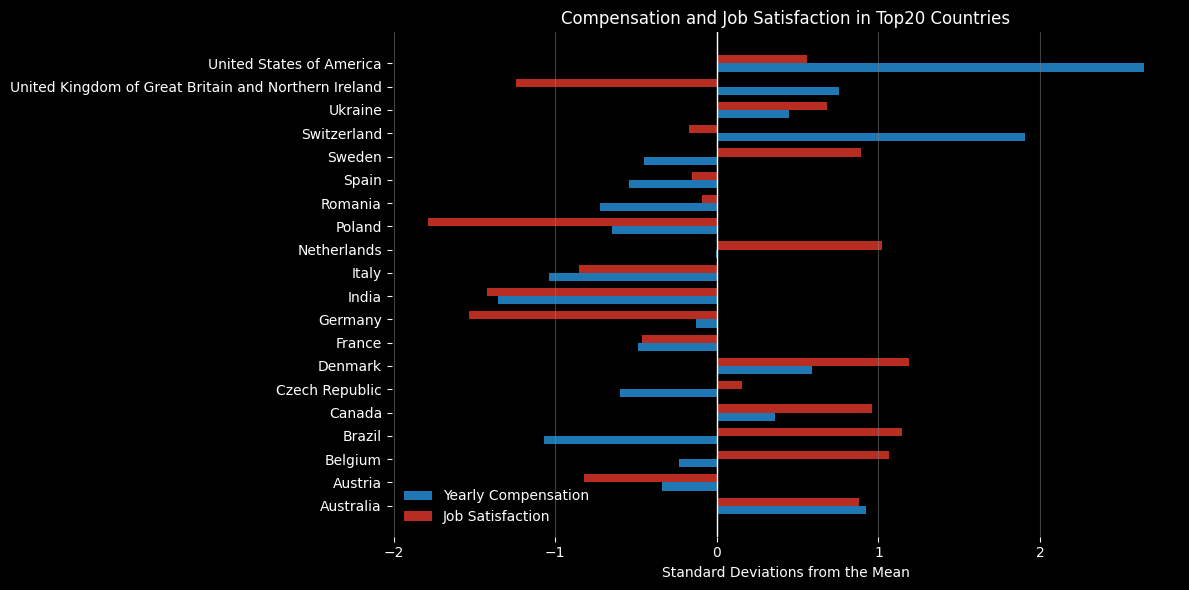

In [25]:
# Plot the Compensation and Job Satisfaction Standard deviations from mean for each of the Top20 Countries on horozontal bar chart:

# Create an array for the vertical positions of each country
y_pos = np.arange(len(df_Country_Comp_JobSat_top20_mean))

# Set the height (or thickness) of each bar
bar_height = 0.35

# Adjust the y-positions so the bars appear grouped for each country
y_pos_a = y_pos - bar_height / 2
y_pos_b = y_pos + bar_height / 2

# Define color for all text elements
text_color = 'white'

# Define softer color variants for the bars
softer_blue = '#1f77b4'
softer_red = "#b82d21"

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Set the background color for the figure and the plot area
fig.set_facecolor('black')
ax.set_facecolor('black')

# Plot value_a in blue
ax.barh(y_pos_a, df_Country_Comp_JobSat_top20_mean['comp_z_score'], height=bar_height, label='Yearly Compensation', color=softer_blue)

# Plot value_b in red
ax.barh(y_pos_b, df_Country_Comp_JobSat_top20_mean['jobsat_z_score'], height=bar_height, label='Job Satisfaction', color=softer_red)

# Customize the plot appearance for a dark theme

# Add vertical gridlines at the x-axis points
ax.grid(axis='x', linestyle='-', alpha=0.5, color='gray')

# Remove the border (spines) around the graph
for spine in ax.spines.values():
    spine.set_visible(False)

# Remove the legend border and set legend text color
legend = ax.legend(frameon=False)
for text in legend.get_texts():
    text.set_color(text_color)

# Set the tick positions to the middle of each country's group
ax.set_yticks(y_pos)  
# Label the y-axis with country names
ax.set_yticklabels(df_Country_Comp_JobSat_top20_mean['Country'], color=text_color)
# Set x-axis label color and tick colors
ax.set_xlabel('Standard Deviations from the Mean', color=text_color)
ax.set_title('Compensation and Job Satisfaction in Top20 Countries', color=text_color)
ax.tick_params(axis='x', colors=text_color)
ax.tick_params(axis='y', colors=text_color)

# Add a vertical line at x=0 for clarity
ax.axvline(x=0, color=text_color, linestyle='-', linewidth=1)

plt.tight_layout()
plt.show()

The above shows some interesting contrasts. The US, Switzerland and Australia stand-out as higher earners with mostly satisfied employees. While colleges in the UK appear to be fairly well compensated but are apparently not too happy! This in contrast to Brazil where pay levels are comparitively low but goodness, most seem to be smiling none the less, with second highest job satisfaction rating next to Denmark.

In [26]:
# Now lets understand what compensation and job satisfaction look like per industry. Here we look at the entire dataset, not specifically the top 20 countries.

# list of industries 
industries = industry_plot_data.index.values 

# data frame with industries, compensation and job satisfaction data
df_Industry_Comp_JobSat = df_main[['Industry', 'ConvertedCompYearly', 'JobSat']]

# check for NaN's
df_Industry_Comp_JobSat.isna().sum()


Industry               15516
ConvertedCompYearly    25195
JobSat                 22480
dtype: int64

In [27]:
# remove NaN's and check sample size
df_Industry_Comp_JobSat.dropna(inplace = True)
len(df_Industry_Comp_JobSat)

19001

In [28]:
# calculate mean compensation and job satisfaction per industry

df_Industry_Comp_JobSat_mean = df_Industry_Comp_JobSat.groupby('Industry')[['ConvertedCompYearly', 'JobSat']].mean().reset_index()
df_Industry_Comp_JobSat_mean.head(20)

,Industry,ConvertedCompYearly,JobSat
0,Banking/Financial Services,109904.358911,7.148515
1,Computer Systems Design and Services,143285.691327,7.533163
2,Energy,112851.929440,7.367397
3,Fintech,119910.465565,7.301194
4,Government,112003.487805,7.076423
5,Healthcare,109286.144242,7.071515
6,Higher Education,79919.504110,7.345205
7,Insurance,101580.563177,6.895307
8,"Internet, Telecomm or Information Services",117213.719337,7.186740
9,Manufacturing,83834.343612,7.104258


In [29]:
# Normalise/Standardise compensation and job satisfaction calculating z-score to understand the standard deviations from mean per industry
df_Industry_Comp_JobSat_mean['comp_z_score'] = df_Industry_Comp_JobSat_mean['ConvertedCompYearly'].transform(z_score)
df_Industry_Comp_JobSat_mean['jobsat_z_score'] = df_Industry_Comp_JobSat_mean['JobSat'].transform(z_score)

df_Industry_Comp_JobSat_mean.head(20)

,Industry,ConvertedCompYearly,JobSat,comp_z_score,jobsat_z_score
0,Banking/Financial Services,109904.358911,7.148515,0.248279,-0.200180
1,Computer Systems Design and Services,143285.691327,7.533163,2.424836,2.114064
2,Energy,112851.929440,7.367397,0.440469,1.116726
3,Fintech,119910.465565,7.301194,0.900706,0.718415
4,Government,112003.487805,7.076423,0.385148,-0.633924
5,Healthcare,109286.144242,7.071515,0.207970,-0.663450
6,Higher Education,79919.504110,7.345205,-1.706818,0.983213
7,Insurance,101580.563177,6.895307,-0.294456,-1.723611
8,"Internet, Telecomm or Information Services",117213.719337,7.186740,0.724870,0.029804
9,Manufacturing,83834.343612,7.104258,-1.451560,-0.466450


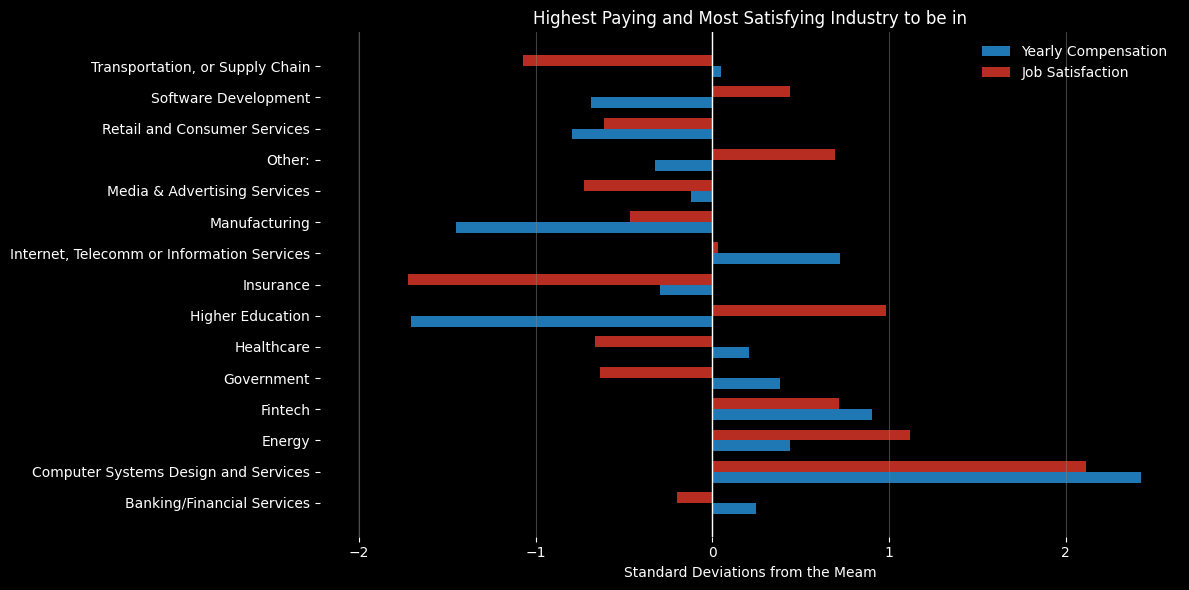

In [30]:
# plot standardeviations from mean per Industry for Compensation and Job Satisfaction on similar horozontal bar graph

# create array for vertical positions of each country
y_pos = np.arange(len(df_Industry_Comp_JobSat_mean))

# set height (or thickness) of each bar
bar_height = 0.35

# adjust y-positions so the bars appear grouped for each country
y_pos_a = y_pos - bar_height / 2
y_pos_b = y_pos + bar_height / 2

# text colour
text_color = 'white'

# colour variants for the bars
soft_blue = '#1f77b4'
soft_red = '#b82d21'

# create plot
fig, ax = plt.subplots(figsize = (12,6))

# set background colour for figure and plot area
fig.set_facecolor('black')
ax.set_facecolor('black')

# plot compensation in blue
ax.barh(y_pos_a, df_Industry_Comp_JobSat_mean['comp_z_score'],height=bar_height, label='Yearly Compensation', color=soft_blue)

# plot job satisfaction in red
ax.barh(y_pos_b, df_Industry_Comp_JobSat_mean['jobsat_z_score'], height=bar_height, label='Job Satisfaction', color=soft_red)

# make the plot appearance 'dark'

# add vertical grid lines at x-axis points
ax.grid(axis='x', linestyle = '-', alpha=0.5, color='gray') # - (single dash) gives a solid line... '--' gives a dashed line

# remove the border (spines) around the graph
for spine in ax.spines.values():
    spine.set_visible(False)

# remove legend border and set legend text color
legend = ax.legend(frameon = False)
for text in legend.get_texts():
    text.set_color(text_color)

# set y axis tick positions to the middle of each industries 'group' (or 2 bars)
ax.set_yticks(y_pos)
# label y axis with industry names
ax.set_yticklabels(df_Industry_Comp_JobSat_mean['Industry'], color=text_color)

# set x-axis label and tick colors
ax.set_xlabel('Standard Deviations from the Meam', color=text_color)

ax.set_title('Highest Paying and Most Satisfying Industry to be in', color=text_color)
ax.tick_params(axis='x', colors=text_color)
ax.tick_params(axis='y', colors = text_color)

# add vertical line at x=0 for clarity
ax.axvline(x=0, color=text_color, linestyle= '-', linewidth=1)
ax.axvline(x=-2, color=text_color, linestyle= '-', linewidth=0.1)


plt.tight_layout()
plt.show()



Ignoring possible sample bias with regards Software Development industry catagory... its interesting to note that we continue to see very distinct cases where pay does not equal great satisfaction. Take for example Higher Education - apparently the lowest paid industry, ~1.7 standard deviations below mean, but apparetnly more satisfying than Fintech, a new, exciting and better paying industry by the look of it.

In [31]:
# Now lets try to get a view of whether or not using AI in development affects compensation and job satisfaction

# lets undertand, per country and industry, the proportion of respondents that said they work with AI (AISelect feature)

print(df_main['AISelect'].value_counts())
print()
print(df_main['AISelect'].value_counts(normalize=True))

AISelect
Yes, I use AI tools daily                      15863
Yes, I use AI tools weekly                      5951
No, and I don't plan to                         5453
Yes, I use AI tools monthly or infrequently     4624
No, but I plan to soon                          1795
Name: count, dtype: int64

AISelect
Yes, I use AI tools daily                      0.470908
Yes, I use AI tools weekly                     0.176661
No, and I don't plan to                        0.161877
Yes, I use AI tools monthly or infrequently    0.137268
No, but I plan to soon                         0.053286
Name: proportion, dtype: float64


In [32]:
#get the 'Yes' or 'No' only from AISelect feature

df_main['AISelect_Yes_No'] = df_main['AISelect'].str.split(',', n=1).str[0].str.strip()
df_main.head(10)

,ResponseId,Age,EdLevel,WorkExp,YearsCode,DevType,Industry,Country,AIModelsHaveWorkedWith,AISelect,ConvertedCompYearly,JobSat,AISelect_Yes_No
0,1,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",8.0,14.0,"Developer, mobile",Fintech,Ukraine,openAI GPT (chatbot models);openAI Image gener...,"Yes, I use AI tools monthly or infrequently",61256.0,10.0,Yes
1,2,25-34 years old,"Associate degree (A.A., A.S., etc.)",2.0,10.0,"Developer, back-end",Retail and Consumer Services,Netherlands,openAI GPT (chatbot models),"Yes, I use AI tools weekly",104413.0,9.0,Yes
2,3,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10.0,12.0,"Developer, front-end",Software Development,Ukraine,Gemini (Flash general purpose models);openAI G...,"Yes, I use AI tools daily",53061.0,8.0,Yes
3,4,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4.0,5.0,"Developer, back-end",Retail and Consumer Services,Ukraine,NaN,"Yes, I use AI tools weekly",36197.0,6.0,Yes
4,5,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",21.0,22.0,Engineering manager,Software Development,Ukraine,openAI GPT (chatbot models),"Yes, I use AI tools weekly",60000.0,7.0,Yes
5,6,45-54 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",15.0,20.0,"Developer, back-end",Fintech,Ukraine,NaN,"Yes, I use AI tools daily",120000.0,7.0,Yes
6,7,25-34 years old,Some college/university study without earning ...,9.0,13.0,"Developer, full-stack",Insurance,Ukraine,NaN,"Yes, I use AI tools daily",6240.0,6.0,Yes
7,8,35-44 years old,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",22.0,30.0,"Architect, software or solutions",Software Development,Ukraine,openAI GPT (chatbot models),"Yes, I use AI tools daily",72000.0,6.0,Yes
8,9,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9.0,15.0,Data engineer,Banking/Financial Services,Ukraine,NaN,"Yes, I use AI tools monthly or infrequently",70000.0,8.0,Yes
9,10,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",7.0,10.0,"Developer, mobile",Software Development,Ukraine,NaN,"No, and I don't plan to",5400.0,4.0,No


In [33]:
# add an numeric column for AI used in development with 1 = Yes and 0 = No

#create a mapping to preserve NaNs (something like a boolean mask, converting to int would not preseve NaNs)
df_main['AIUsed'] = df_main['AISelect_Yes_No'].map({'Yes': 1, 'No':0})
df_main.head(10)

,ResponseId,Age,EdLevel,WorkExp,YearsCode,DevType,Industry,Country,AIModelsHaveWorkedWith,AISelect,ConvertedCompYearly,JobSat,AISelect_Yes_No,AIUsed
0,1,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",8.0,14.0,"Developer, mobile",Fintech,Ukraine,openAI GPT (chatbot models);openAI Image gener...,"Yes, I use AI tools monthly or infrequently",61256.0,10.0,Yes,1.0
1,2,25-34 years old,"Associate degree (A.A., A.S., etc.)",2.0,10.0,"Developer, back-end",Retail and Consumer Services,Netherlands,openAI GPT (chatbot models),"Yes, I use AI tools weekly",104413.0,9.0,Yes,1.0
2,3,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10.0,12.0,"Developer, front-end",Software Development,Ukraine,Gemini (Flash general purpose models);openAI G...,"Yes, I use AI tools daily",53061.0,8.0,Yes,1.0
3,4,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4.0,5.0,"Developer, back-end",Retail and Consumer Services,Ukraine,NaN,"Yes, I use AI tools weekly",36197.0,6.0,Yes,1.0
4,5,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",21.0,22.0,Engineering manager,Software Development,Ukraine,openAI GPT (chatbot models),"Yes, I use AI tools weekly",60000.0,7.0,Yes,1.0
5,6,45-54 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",15.0,20.0,"Developer, back-end",Fintech,Ukraine,NaN,"Yes, I use AI tools daily",120000.0,7.0,Yes,1.0
6,7,25-34 years old,Some college/university study without earning ...,9.0,13.0,"Developer, full-stack",Insurance,Ukraine,NaN,"Yes, I use AI tools daily",6240.0,6.0,Yes,1.0
7,8,35-44 years old,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",22.0,30.0,"Architect, software or solutions",Software Development,Ukraine,openAI GPT (chatbot models),"Yes, I use AI tools daily",72000.0,6.0,Yes,1.0
8,9,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9.0,15.0,Data engineer,Banking/Financial Services,Ukraine,NaN,"Yes, I use AI tools monthly or infrequently",70000.0,8.0,Yes,1.0
9,10,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",7.0,10.0,"Developer, mobile",Software Development,Ukraine,NaN,"No, and I don't plan to",5400.0,4.0,No,0.0


In [34]:
# now lets get the fields of interest to answer the question into a dataframe and check for the NaN's

df_Comp_JobSat_AI = df_main[['Country','ConvertedCompYearly', 'JobSat', 'AIUsed']]
df_Comp_JobSat_AI.isna().sum()

Country                13721
ConvertedCompYearly    25195
JobSat                 22480
AIUsed                 15437
dtype: int64

In [35]:
# drop NaN's and check the number of samples left....
df_Comp_JobSat_AI.dropna(inplace=True)
len(df_Comp_JobSat_AI)

18947

In [36]:
# what does the AIUsed proportion look like
df_Comp_JobSat_AI['AIUsed'].value_counts(normalize=True)

AIUsed
1.0    0.817808
0.0    0.182192
Name: proportion, dtype: float64

In [37]:
# Now lets focus on the samples from Top 20 countries

df_Comp_JobSat_AI_top20 = df_Comp_JobSat_AI[df_Comp_JobSat_AI['Country'].isin(top_20_countries)].reset_index()
df_Comp_JobSat_AI_top20.head(20)

,index,Country,ConvertedCompYearly,JobSat,AIUsed
0,0,Ukraine,61256.0,10.0,1.0
1,1,Netherlands,104413.0,9.0,1.0
2,2,Ukraine,53061.0,8.0,1.0
3,3,Ukraine,36197.0,6.0,1.0
4,4,Ukraine,60000.0,7.0,1.0
5,5,Ukraine,120000.0,7.0,1.0
6,6,Ukraine,6240.0,6.0,1.0
7,7,Ukraine,72000.0,6.0,1.0
8,8,Ukraine,70000.0,8.0,1.0
9,9,Ukraine,5400.0,4.0,0.0


In [38]:
# now lets get the mean compensation and job satisfaction per country when AI is used and not used

df_Comp_JobSat_AI_top20_mean = df_Comp_JobSat_AI_top20.groupby(['Country', 'AIUsed'])[['ConvertedCompYearly', 'JobSat']].mean().reset_index()
df_Comp_JobSat_AI_top20_mean.head(50)

,Country,AIUsed,ConvertedCompYearly,JobSat
0,Australia,0.0,95506.861111,7.351852
1,Australia,1.0,128939.336182,7.344729
2,Austria,0.0,84421.315789,6.868421
3,Austria,1.0,79029.075676,7.097297
4,Belgium,0.0,70229.937500,6.906250
5,Belgium,1.0,86468.145833,7.500000
6,Brazil,0.0,38018.963636,7.581818
7,Brazil,1.0,58494.134490,7.353579
8,Canada,0.0,93566.096774,7.329032
9,Canada,1.0,105745.315972,7.401042


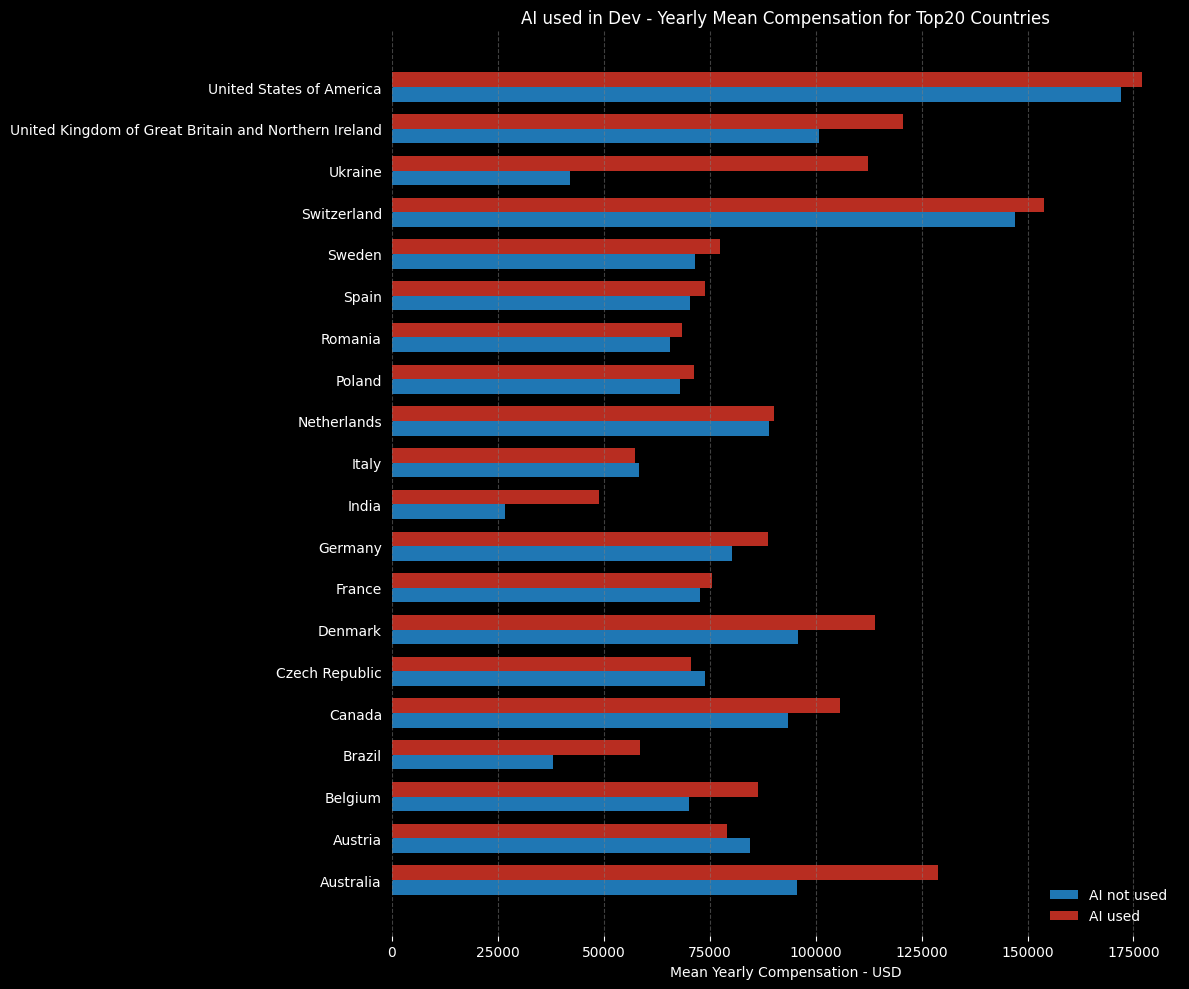

In [39]:
# now plot horozontal bar graphs of compensation and job satisfaction per country when AI is used and not

# start with Compensation

# prepare data for plotting
countries = df_Comp_JobSat_AI_top20_mean['Country'].unique() # get unique coutnries for Labels
ai_used_0_data = df_Comp_JobSat_AI_top20_mean[df_Comp_JobSat_AI_top20_mean['AIUsed'] == 0].set_index('Country')['ConvertedCompYearly'] # get compensation where AI is not used
ai_used_1_data = df_Comp_JobSat_AI_top20_mean[df_Comp_JobSat_AI_top20_mean['AIUsed'] == 1].set_index('Country')['ConvertedCompYearly'] # get compensation where AI is used

# text colour
text_color = 'white'

# colour variants for the bars
soft_blue = '#1f77b4'
soft_red = '#b82d21'

# set-up the plot
fig, ax = plt.subplots(figsize=(12,10))

y_pos = np.arange(len(countries))
bar_height = 0.35

# plot the bars
ax.barh(y_pos - bar_height/2, ai_used_0_data, bar_height, label='AI not used', color = soft_blue)
ax.barh(y_pos + bar_height/2, ai_used_1_data, bar_height,label='AI used', color=soft_red)

# customise the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(countries, color=text_color)
ax.set_xlabel('Mean Yearly Compensation - USD', color=text_color)

ax.set_title('AI used in Dev - Yearly Mean Compensation for Top20 Countries', color=text_color)
ax.grid(axis='x', linestyle='--',alpha=0.5, color='gray')

# set background colour for figure and plot area
fig.set_facecolor('black')
ax.set_facecolor('black')

# remove the border (spines) around the graph
for spine in ax.spines.values():
    spine.set_visible(False)

# remove legend border and set legend text color
legend = ax.legend(frameon = False)
for text in legend.get_texts():
    text.set_color(text_color)

ax.tick_params(axis='x', colors=text_color) #use the default generated x tick labels but change the color to be consitant 

plt.tight_layout()
plt.show()

While there does appear to be some initial support to say that using AI in development might help compensation, I don't believe we can draw any firm conclusion at this point.

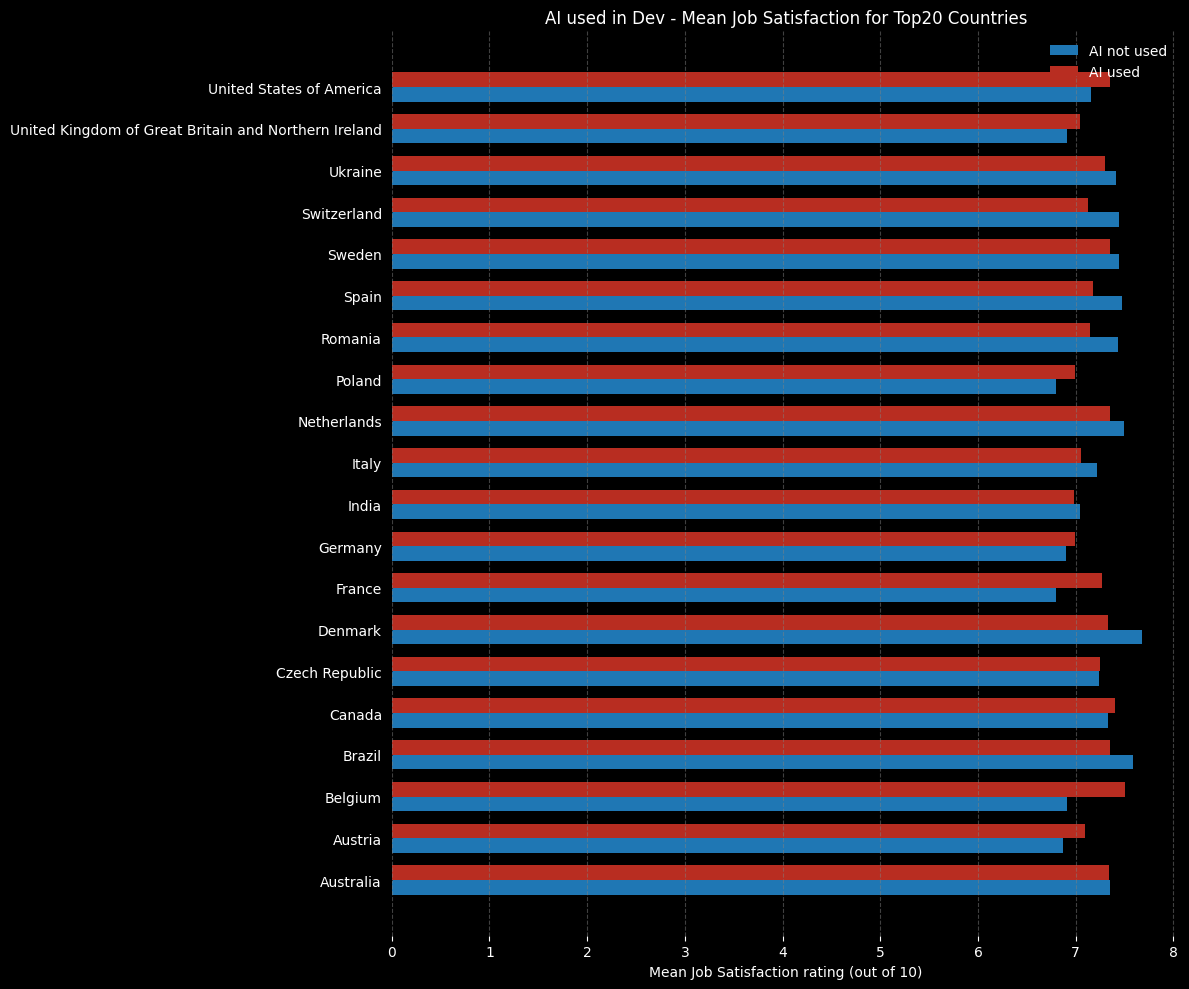

In [40]:
# now plot for Job satisfaction where AI is used

# prepare data for plotting
countries = df_Comp_JobSat_AI_top20_mean['Country'].unique() # get unique coutnries for Labels
ai_used_0_data = df_Comp_JobSat_AI_top20_mean[df_Comp_JobSat_AI_top20_mean['AIUsed'] == 0].set_index('Country')['JobSat'] # get  where AI is not used
ai_used_1_data = df_Comp_JobSat_AI_top20_mean[df_Comp_JobSat_AI_top20_mean['AIUsed'] == 1].set_index('Country')['JobSat'] # get compensation where AI is used

# text colour
text_color = 'white'

# colour variants for the bars
soft_blue = '#1f77b4'
soft_red = '#b82d21'

# set-up the plot
fig, ax = plt.subplots(figsize=(12,10))

y_pos = np.arange(len(countries))
bar_height = 0.35

# plot the bars
ax.barh(y_pos - bar_height/2, ai_used_0_data, bar_height, label='AI not used', color = soft_blue)
ax.barh(y_pos + bar_height/2, ai_used_1_data, bar_height,label='AI used', color=soft_red)

# customise the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(countries, color=text_color)
ax.set_xlabel('Mean Job Satisfaction rating (out of 10)', color=text_color)

ax.set_title('AI used in Dev - Mean Job Satisfaction for Top20 Countries', color=text_color)
ax.grid(axis='x', linestyle='--',alpha=0.5, color='gray')

# set background colour for figure and plot area
fig.set_facecolor('black')
ax.set_facecolor('black')

# remove the border (spines) around the graph
for spine in ax.spines.values():
    spine.set_visible(False)

# remove legend border and set legend text color
legend = ax.legend(frameon = False)
legend.set_loc('best')
for text in legend.get_texts():
    text.set_color(text_color)

ax.tick_params(axis='x', colors=text_color) #use the default generated x tick labels but hcange the color to be consitant 

plt.tight_layout()
plt.show()



Similarly I don't believe we can draw any conclusion as to whether or not the use of AI in development helps our colleges feel more or less satisfied at work!   


### Developer Salary Prediction (attempt!)

Now that we have a view of where the best paying, most satisfying place to be a developer might be, lets attempt to predict what a developers salary should be using a subset of core features.   

Features used for prediction are: 'Age', 'EdLevel', 'WorkExp', 'YearsCode', 'DevType', 'Industry', 'Country', 'AIUsed' and 'RemoteWork'. 'ConvertedCompYearly' is our target.

In [41]:
# Lets first attempt to predict salaries using simple linear regression and guage accuracy of the prediction

# these are the fields in our 'main' df:
print(df_main.columns)
df_main.head(5)

Index(['ResponseId', 'Age', 'EdLevel', 'WorkExp', 'YearsCode', 'DevType',
       'Industry', 'Country', 'AIModelsHaveWorkedWith', 'AISelect',
       'ConvertedCompYearly', 'JobSat', 'AISelect_Yes_No', 'AIUsed'],
      dtype='object')


,ResponseId,Age,EdLevel,WorkExp,YearsCode,DevType,Industry,Country,AIModelsHaveWorkedWith,AISelect,ConvertedCompYearly,JobSat,AISelect_Yes_No,AIUsed
0,1,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",8.0,14.0,"Developer, mobile",Fintech,Ukraine,openAI GPT (chatbot models);openAI Image gener...,"Yes, I use AI tools monthly or infrequently",61256.0,10.0,Yes,1.0
1,2,25-34 years old,"Associate degree (A.A., A.S., etc.)",2.0,10.0,"Developer, back-end",Retail and Consumer Services,Netherlands,openAI GPT (chatbot models),"Yes, I use AI tools weekly",104413.0,9.0,Yes,1.0
2,3,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10.0,12.0,"Developer, front-end",Software Development,Ukraine,Gemini (Flash general purpose models);openAI G...,"Yes, I use AI tools daily",53061.0,8.0,Yes,1.0
3,4,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4.0,5.0,"Developer, back-end",Retail and Consumer Services,Ukraine,NaN,"Yes, I use AI tools weekly",36197.0,6.0,Yes,1.0
4,5,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",21.0,22.0,Engineering manager,Software Development,Ukraine,openAI GPT (chatbot models),"Yes, I use AI tools weekly",60000.0,7.0,Yes,1.0


In [42]:
# I would like to include 'remote work' and use the following features - Age, EdLevel, WorkExp, DevType, Industry, Country, ConvertedCompYearly, AIUsed; for the prediction

print(df_main.shape)
print(df_survey_results.shape)

df_main['RemoteWork'] = df_survey_results['RemoteWork'] # add the RemoteWork column to our 'main' dataframe

df_main.head(10)

(49123, 14)
(49123, 170)


,ResponseId,Age,EdLevel,WorkExp,YearsCode,DevType,Industry,Country,AIModelsHaveWorkedWith,AISelect,ConvertedCompYearly,JobSat,AISelect_Yes_No,AIUsed,RemoteWork
0,1,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",8.0,14.0,"Developer, mobile",Fintech,Ukraine,openAI GPT (chatbot models);openAI Image gener...,"Yes, I use AI tools monthly or infrequently",61256.0,10.0,Yes,1.0,Remote
1,2,25-34 years old,"Associate degree (A.A., A.S., etc.)",2.0,10.0,"Developer, back-end",Retail and Consumer Services,Netherlands,openAI GPT (chatbot models),"Yes, I use AI tools weekly",104413.0,9.0,Yes,1.0,"Hybrid (some in-person, leans heavy to flexibi..."
2,3,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10.0,12.0,"Developer, front-end",Software Development,Ukraine,Gemini (Flash general purpose models);openAI G...,"Yes, I use AI tools daily",53061.0,8.0,Yes,1.0,NaN
3,4,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4.0,5.0,"Developer, back-end",Retail and Consumer Services,Ukraine,NaN,"Yes, I use AI tools weekly",36197.0,6.0,Yes,1.0,Remote
4,5,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",21.0,22.0,Engineering manager,Software Development,Ukraine,openAI GPT (chatbot models),"Yes, I use AI tools weekly",60000.0,7.0,Yes,1.0,NaN
5,6,45-54 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",15.0,20.0,"Developer, back-end",Fintech,Ukraine,NaN,"Yes, I use AI tools daily",120000.0,7.0,Yes,1.0,NaN
6,7,25-34 years old,Some college/university study without earning ...,9.0,13.0,"Developer, full-stack",Insurance,Ukraine,NaN,"Yes, I use AI tools daily",6240.0,6.0,Yes,1.0,NaN
7,8,35-44 years old,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",22.0,30.0,"Architect, software or solutions",Software Development,Ukraine,openAI GPT (chatbot models),"Yes, I use AI tools daily",72000.0,6.0,Yes,1.0,Remote
8,9,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9.0,15.0,Data engineer,Banking/Financial Services,Ukraine,NaN,"Yes, I use AI tools monthly or infrequently",70000.0,8.0,Yes,1.0,Remote
9,10,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",7.0,10.0,"Developer, mobile",Software Development,Ukraine,NaN,"No, and I don't plan to",5400.0,4.0,No,0.0,Remote


In [43]:
# sooooo... lets get the respective columns, ditch all the NaN's and (hopefully!) decently encode all the respective categorical features!

df_salary_pred = df_main[['Age', 'EdLevel', 'WorkExp', 'YearsCode', 'DevType',
       'Industry', 'Country', 'AIUsed', 'RemoteWork', 'ConvertedCompYearly']]

In [44]:
# check number of samples and NaN's
print(df_salary_pred.shape)
df_salary_pred.isna().sum()

(49123, 10)


Age                        0
EdLevel                 1036
WorkExp                 6279
YearsCode               6123
DevType                 5487
Industry               15516
Country                13721
AIUsed                 15437
RemoteWork             15376
ConvertedCompYearly    25195
dtype: int64

In [45]:
# remove NaN's and check the remaing sample size

df_salary_pred.dropna(inplace=True)

print(df_salary_pred.shape)
df_salary_pred.isna().sum()

(20082, 10)


Age                    0
EdLevel                0
WorkExp                0
YearsCode              0
DevType                0
Industry               0
Country                0
AIUsed                 0
RemoteWork             0
ConvertedCompYearly    0
dtype: int64

In [46]:
# Now we need to check values in categorical columns and encode to a numeric form

# starting with 'Age'
df_salary_pred['Age'].value_counts()

Age
25-34 years old      7474
35-44 years old      6508
45-54 years old      2832
18-24 years old      1986
55-64 years old      1082
65 years or older     191
Prefer not to say       9
Name: count, dtype: int64

In [47]:
# to be honest age should not be a factor in determining salary, thats more work experience. Never the less lets include it as a variable, but we'll onehot encode using pd.get_dummies()
# so as not to create any numerical order/preference

# get age bin dummy data
age_dummies = pd.get_dummies(df_salary_pred['Age'], prefix='Age_', dtype=int)

In [48]:
# add the age dummies to the salary prediction dataframe and drop the original column

df_salary_pred_numeric = pd.concat([df_salary_pred.drop('Age', axis=1), age_dummies], axis=1,)
df_salary_pred_numeric.head(10)

,EdLevel,WorkExp,YearsCode,DevType,Industry,Country,AIUsed,RemoteWork,ConvertedCompYearly,Age__18-24 years old,Age__25-34 years old,Age__35-44 years old,Age__45-54 years old,Age__55-64 years old,Age__65 years or older,Age__Prefer not to say
0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",8.0,14.0,"Developer, mobile",Fintech,Ukraine,1.0,Remote,61256.0,0,1,0,0,0,0,0
1,"Associate degree (A.A., A.S., etc.)",2.0,10.0,"Developer, back-end",Retail and Consumer Services,Netherlands,1.0,"Hybrid (some in-person, leans heavy to flexibi...",104413.0,0,1,0,0,0,0,0
3,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4.0,5.0,"Developer, back-end",Retail and Consumer Services,Ukraine,1.0,Remote,36197.0,0,0,1,0,0,0,0
7,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",22.0,30.0,"Architect, software or solutions",Software Development,Ukraine,1.0,Remote,72000.0,0,0,1,0,0,0,0
8,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9.0,15.0,Data engineer,Banking/Financial Services,Ukraine,1.0,Remote,70000.0,0,1,0,0,0,0,0
9,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",7.0,10.0,"Developer, mobile",Software Development,Ukraine,0.0,Remote,5400.0,0,1,0,0,0,0,0
10,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",7.0,9.0,"Developer, back-end",Fintech,Ukraine,1.0,Remote,65691.0,0,1,0,0,0,0,0
11,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3.0,5.0,"Developer, back-end",Fintech,Ukraine,1.0,Remote,14400.0,1,0,0,0,0,0,0
22,Some college/university study without earning ...,7.0,11.0,"Developer, full-stack",Fintech,United States of America,1.0,Remote,87500.0,0,1,0,0,0,0,0
27,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",24.0,36.0,"Developer, full-stack",Banking/Financial Services,Sweden,1.0,"Hybrid (some remote, leans heavy to in-person)",209643.0,0,0,0,1,0,0,0


In [49]:
# next up is EdLevel - which in my view has some ordinality about it
df_salary_pred['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          8896
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       5879
Some college/university study without earning a degree                                2317
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                        1176
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     894
Associate degree (A.A., A.S., etc.)                                                    670
Other (please specify):                                                                170
Primary/elementary school                                                               80
Name: count, dtype: int64

In [50]:
# create a numerical, hirearchical mapping of EdLevel 
EdLevel_numeric = {'Primary/elementary school':0,'Other (please specify):' : 1, 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 2,
                   'Associate degree (A.A., A.S., etc.)':4, 'Some college/university study without earning a degree': 3, 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 5,
                   'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 6, 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)':7}


In [51]:
# map the EdLevel feature to the above numeric values
df_salary_pred_numeric['EdLevel_numeric'] = df_salary_pred_numeric['EdLevel'].map(EdLevel_numeric)
df_salary_pred_numeric.drop('EdLevel', axis=1, inplace=True)
df_salary_pred_numeric.head(5)

,WorkExp,YearsCode,DevType,Industry,Country,AIUsed,RemoteWork,ConvertedCompYearly,Age__18-24 years old,Age__25-34 years old,Age__35-44 years old,Age__45-54 years old,Age__55-64 years old,Age__65 years or older,Age__Prefer not to say,EdLevel_numeric
0,8.0,14.0,"Developer, mobile",Fintech,Ukraine,1.0,Remote,61256.0,0,1,0,0,0,0,0,6
1,2.0,10.0,"Developer, back-end",Retail and Consumer Services,Netherlands,1.0,"Hybrid (some in-person, leans heavy to flexibi...",104413.0,0,1,0,0,0,0,0,4
3,4.0,5.0,"Developer, back-end",Retail and Consumer Services,Ukraine,1.0,Remote,36197.0,0,0,1,0,0,0,0,5
7,22.0,30.0,"Architect, software or solutions",Software Development,Ukraine,1.0,Remote,72000.0,0,0,1,0,0,0,0,7
8,9.0,15.0,Data engineer,Banking/Financial Services,Ukraine,1.0,Remote,70000.0,0,1,0,0,0,0,0,5


In [52]:
# Note: other columns - DevType, Industry, Country, RemoteWork will all be one hot encoded, given the values and no sence of ordinality should be applied
oneHotEncodeCols = ['DevType', 'Industry', 'Country', 'RemoteWork']

for col in oneHotEncodeCols:
    col_dummies = pd.get_dummies(df_salary_pred_numeric[col], prefix=col + '_', dtype=int)
    df_salary_pred_numeric = pd.concat([df_salary_pred_numeric.drop(col, axis=1), col_dummies], axis=1) # pd.concat returns a dataframe so you need to assign it to the 
                                                                                                        # existing df to actually update the existing df

In [53]:
# check the completed, converted dataframe before attempting modeling 

print(len(df_salary_pred_numeric))
df_salary_pred_numeric.head(5)

20082


,WorkExp,YearsCode,AIUsed,ConvertedCompYearly,Age__18-24 years old,Age__25-34 years old,Age__35-44 years old,Age__45-54 years old,Age__55-64 years old,Age__65 years or older,Age__Prefer not to say,EdLevel_numeric,DevType__AI/ML engineer,DevType__Academic researcher,DevType__Applied scientist,"DevType__Architect, software or solutions",DevType__Cloud infrastructure engineer,DevType__Cybersecurity or InfoSec professional,DevType__Data engineer,DevType__Data or business analyst,DevType__Data scientist,DevType__Database administrator or engineer,DevType__DevOps engineer or professional,"DevType__Developer, AI apps or physical AI","DevType__Developer, QA or test","DevType__Developer, back-end","DevType__Developer, desktop or enterprise applications","DevType__Developer, embedded applications or devices","DevType__Developer, front-end","DevType__Developer, full-stack","DevType__Developer, game or graphics","DevType__Developer, mobile",DevType__Engineering manager,DevType__Financial analyst or engineer,"DevType__Founder, technology or otherwise",DevType__Other (please specify):,DevType__Product manager,DevType__Project manager,DevType__Retired,"DevType__Senior executive (C-suite, VP, etc.)",DevType__Student,DevType__Support engineer or analyst,DevType__System administrator,"DevType__UX, Research Ops or UI design professional",Industry__Banking/Financial Services,Industry__Computer Systems Design and Services,Industry__Energy,Industry__Fintech,Industry__Government,Industry__Healthcare,Industry__Higher Education,Industry__Insurance,"Industry__Internet, Telecomm or Information Services",Industry__Manufacturing,Industry__Media & Advertising Services,Industry__Other:,Industry__Retail and Consumer Services,Industry__Software Development,"Industry__Transportation, or Supply Chain",Country__Afghanistan,Country__Albania,Country__Algeria,Country__Andorra,Country__Angola,Country__Antigua and Barbuda,Country__Argentina,Country__Armenia,Country__Australia,Country__Austria,Country__Azerbaijan,Country__Bahrain,Country__Bangladesh,Country__Barbados,Country__Belarus,Country__Belgium,Country__Belize,Country__Benin,Country__Bhutan,Country__Bolivia,Country__Bosnia and Herzegovina,Country__Brazil,Country__Bulgaria,Country__Burundi,Country__Cambodia,Country__Cameroon,Country__Canada,Country__Chile,Country__China,Country__Colombia,"Country__Congo, Republic of the...",Country__Costa Rica,Country__Croatia,Country__Cuba,Country__Cyprus,Country__Czech Republic,Country__Côte d'Ivoire,Country__Democratic Republic of the Congo,Country__Denmark,Country__Djibouti,Country__Dominican Republic,Country__Ecuador,Country__Egypt,Country__El Salvador,Country__Estonia,Country__Ethiopia,Country__Finland,Country__France,Country__Georgia,Country__Germany,Country__Ghana,Country__Greece,Country__Guatemala,Country__Guyana,Country__Haiti,Country__Honduras,Country__Hong Kong (S.A.R.),Country__Hungary,Country__Iceland,Country__India,Country__Indonesia,"Country__Iran, Islamic Republic of...",Country__Iraq,Country__Ireland,Country__Isle of Man,Country__Israel,Country__Italy,Country__Jamaica,Country__Japan,Country__Jordan,Country__Kazakhstan,Country__Kenya,Country__Kosovo,Country__Kuwait,Country__Kyrgyzstan,Country__Lao People's Democratic Republic,Country__Latvia,Country__Lebanon,Country__Lesotho,Country__Libyan Arab Jamahiriya,Country__Lithuania,Country__Luxembourg,Country__Madagascar,Country__Malawi,Country__Malaysia,Country__Maldives,Country__Mali,Country__Malta,Country__Mauritania,Country__Mauritius,Country__Mexico,Country__Moldova,Country__Mongolia,Country__Montenegro,Country__Morocco,Country__Mozambique,Country__Myanmar,Country__Namibia,Country__Nepal,Country__Netherlands,Country__New Zealand,Country__Nicaragua,Country__Nigeria,Country__Nomadic,Country__North Korea,Country__Norway,Country__Oman,Country__Pakistan,Country__Palestine,Country__Panama,Country__Papua New Guinea,Country__Paraguay,Country__Peru,Country__Philippines,Country__Poland,Country__Portugal,Country__Qatar,Countr

In [54]:
# so now we have a dataframe that we can use for salary prediction - lets import some required libraries and explore the data abit more
# target variable is ConvertedCompYearly

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_squared_error

In [55]:
# metrics for the target and features that are not binary in nature (or one hot encoded)
df_salary_pred_numeric[['ConvertedCompYearly', 'WorkExp', 'YearsCode', 'EdLevel_numeric']].describe()

,ConvertedCompYearly,WorkExp,YearsCode,EdLevel_numeric
count,2.008200e+04,20082.000000,20082.000000,20082.000000
mean,1.005176e+05,13.288019,17.638283,4.958420
std,3.276603e+05,9.707895,10.684362,1.286821
min,1.000000e+00,1.000000,1.000000,0.000000
25%,4.176500e+04,6.000000,10.000000,5.000000
50%,7.660600e+04,11.000000,15.000000,5.000000
75%,1.225270e+05,19.000000,25.000000,6.000000
max,3.355272e+07,100.000000,100.000000,7.000000


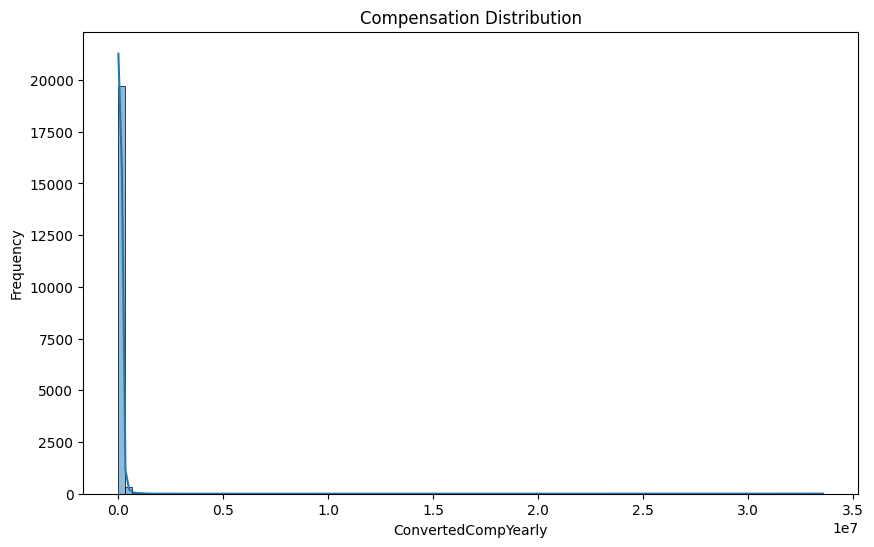

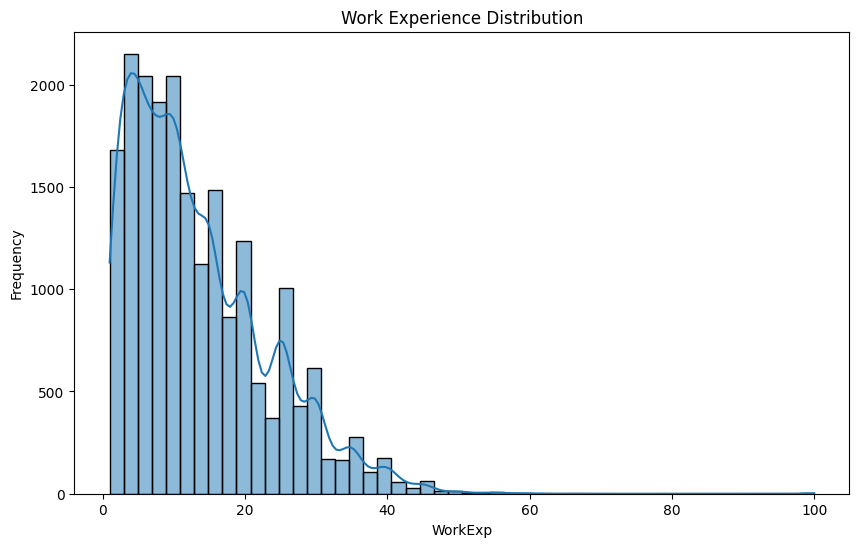

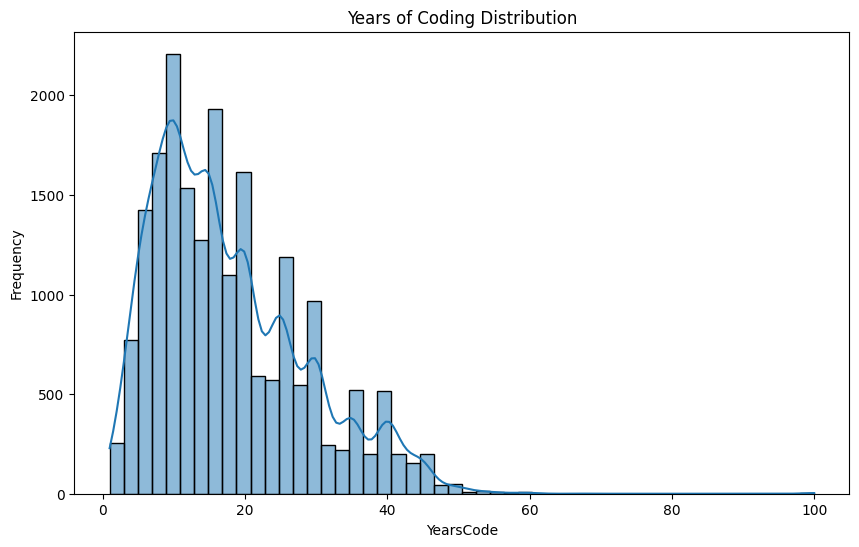

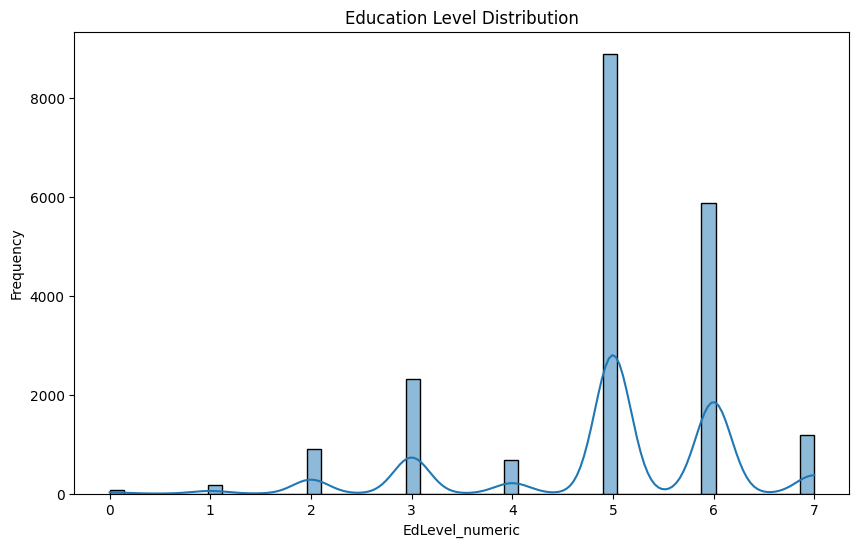

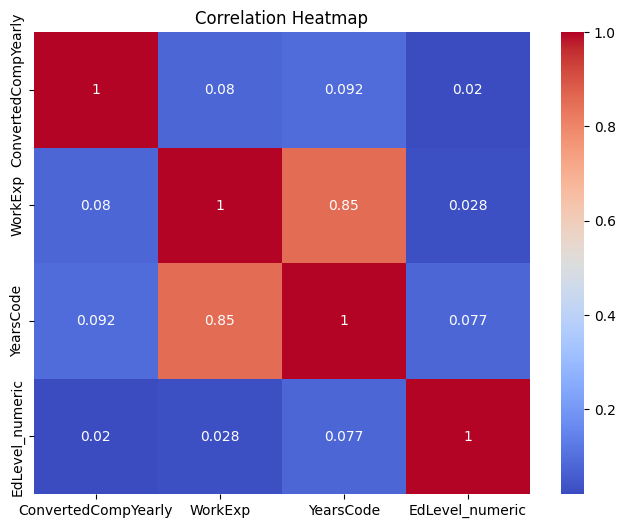

In [56]:
# Histograms of the target and features that are not simply binary in nature (or one hot encoded)
plt.figure(figsize=(10,6))
sns.histplot(df_salary_pred_numeric['ConvertedCompYearly'], bins=100, kde=True)
plt.title('Compensation Distribution')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df_salary_pred_numeric['WorkExp'], bins=50, kde=True)
plt.title('Work Experience Distribution')
plt.xlabel('WorkExp')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df_salary_pred_numeric['YearsCode'], bins=50, kde=True)
plt.title('Years of Coding Distribution')
plt.xlabel('YearsCode')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df_salary_pred_numeric['EdLevel_numeric'], bins=50, kde=True)
plt.title('Education Level Distribution')
plt.xlabel('EdLevel_numeric')
plt.ylabel('Frequency')
plt.show()

# and a Correlation heatmap of the respective same features
plt.figure(figsize=(8,6))
sns.heatmap(df_salary_pred_numeric[['ConvertedCompYearly','WorkExp','YearsCode','EdLevel_numeric']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [57]:
# split the data into feature and target
X_features = df_salary_pred_numeric.drop('ConvertedCompYearly', axis=1)
y_target = df_salary_pred_numeric['ConvertedCompYearly']

In [58]:
# split data into train and test sets

X_train, x_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

In [59]:
# Attempt a simple Linear Regression
# define Linear Regression model and train it
LR_model = LinearRegression()

LR_model.fit(X_train, y_train)

LinearRegression()

In [60]:
#make predictions on test and train data
y_pred_train = LR_model.predict(X_train)
y_pred_test = LR_model.predict(x_test)

In [61]:
# now check model performance - R2 and RMSE
LR_R2 = LR_model.score(x_test, y_test)

print(f'Salary prediction LinearRegression R2 score: {LR_R2:.4f}')

rmse_test = root_mean_squared_error(y_test, y_pred_test)
rmse_train  = np.sqrt(mean_squared_error(y_train, y_pred_train))

print(f'RMSE based on test data: {rmse_test:.2f} \nRMSE based on train data: {rmse_train:.2f}')

Salary prediction LinearRegression R2 score: 0.0051
RMSE based on test data: 546241.46 
RMSE based on train data: 234203.13


As can be seen the Linear Regression is not accurate, with a rather low R2 score and high RMSE. So it explains very little of the variability of the target around its mean and our salary predictions are off by $550k! Certainly improvemnts are needed.

In [62]:
# Attempt using a different simple regression model - XGBoost Regressor 

import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators = 100, max_depth = 10)

In [63]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [64]:
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(x_test)

In [65]:
# now check XGB model performance - R2 and RMSE
xgb_R2 = xgb_model.score(x_test, y_test)

print(f'Salary prediction XGBoost Regressor R2 score: {xgb_R2:.4f}')

rmse_test = root_mean_squared_error(y_test, y_pred_test)
rmse_train  = np.sqrt(mean_squared_error(y_train, y_pred_train))

print(f'RMSE based on test data: {rmse_test:.2f} \nRMSE based on train data: {rmse_train:.2f}')

Salary prediction XGBoost Regressor R2 score: -0.2082
RMSE based on test data: 601953.61 
RMSE based on train data: 41001.64


With lower R2 score and worse RMSE, the XGB Regressor is also clearly not adequate. However, this is likely largely due to the following that can be seen   

High variance in salaries   
Sparse one-hot encoded features   
No outlier handling and high skew in target variable   
No feature scaling   
Little to no Hyperparameter tuning   

We shall attempt to improve the above and re-run the XGB Regressor

In [66]:
# import a few more libraries we'll need to make the improvements

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from xgboost import plot_importance

In [67]:
# remove extreme compensation values 1'st and 99'th percentile
lower = df_salary_pred_numeric['ConvertedCompYearly'].quantile(0.01)
upper = df_salary_pred_numeric['ConvertedCompYearly'].quantile(0.99)

# create a filtered data frame without the extreme compensation values
df_salary_pred_filtered = df_salary_pred_numeric[(df_salary_pred_numeric['ConvertedCompYearly'] >= lower) & (df_salary_pred_numeric['ConvertedCompYearly'] <= upper)].copy()

# apply log transformation to compensation to reduce skew and improve distribution
df_salary_pred_filtered['LogSalary'] = np.log1p(df_salary_pred_filtered['ConvertedCompYearly'])


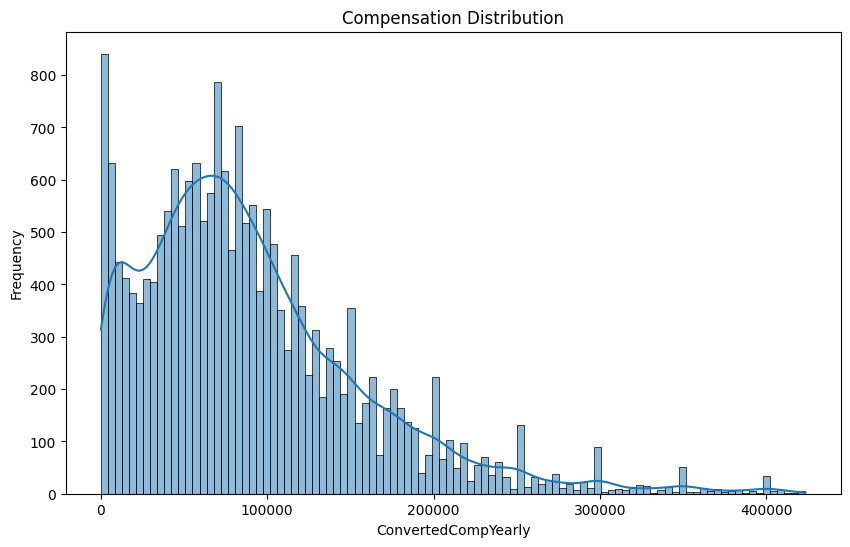

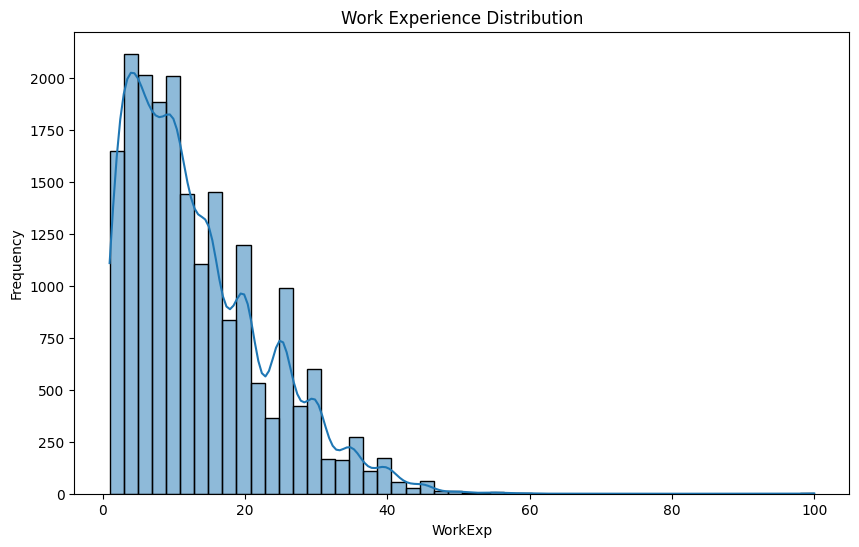

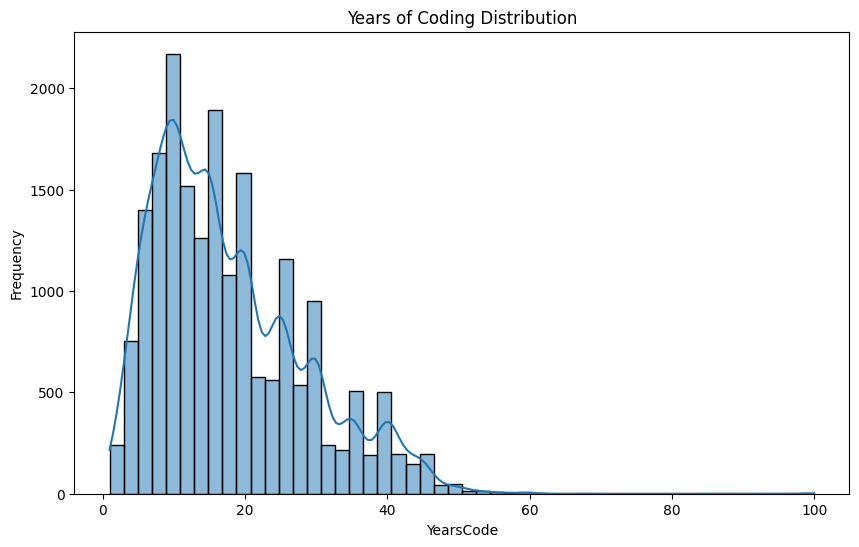

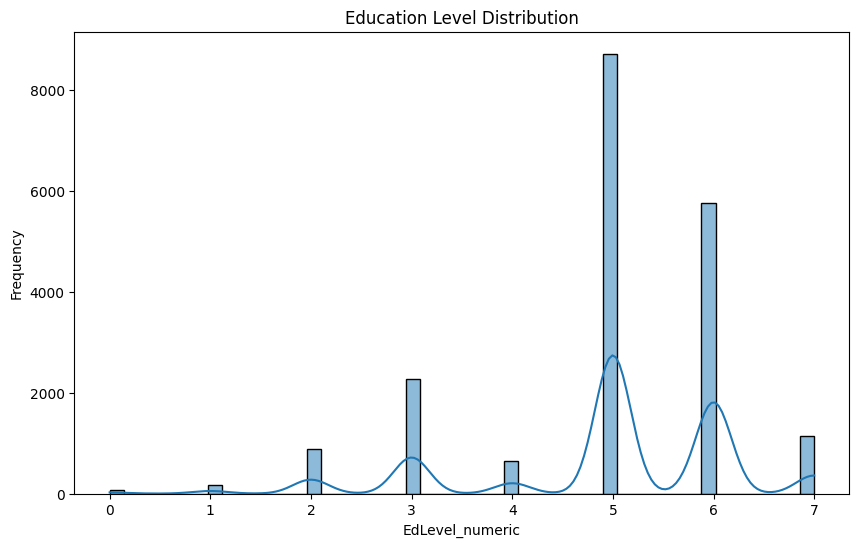

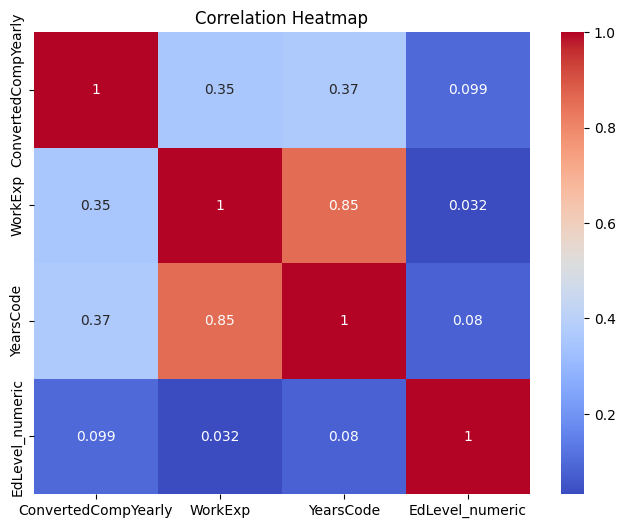

In [68]:
# review Histograms 'filtered' features that are not ninary in nature (or one hot encoded)

plt.figure(figsize=(10,6))
sns.histplot(df_salary_pred_filtered['ConvertedCompYearly'], bins=100, kde=True)
plt.title('Compensation Distribution')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df_salary_pred_filtered['WorkExp'], bins=50, kde=True)
plt.title('Work Experience Distribution')
plt.xlabel('WorkExp')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df_salary_pred_filtered['YearsCode'], bins=50, kde=True)
plt.title('Years of Coding Distribution')
plt.xlabel('YearsCode')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df_salary_pred_filtered['EdLevel_numeric'], bins=50, kde=True)
plt.title('Education Level Distribution')
plt.xlabel('EdLevel_numeric')
plt.ylabel('Frequency')
plt.show()

# and a Correlation heatmap of the respective same features
plt.figure(figsize=(8,6))
sns.heatmap(df_salary_pred_filtered[['ConvertedCompYearly','WorkExp','YearsCode','EdLevel_numeric']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
 

Improved feature data distribution is noted.   

We can now use this pre-processed data to create train and test data split   
We will also standardise our feature data

In [69]:
# create X and y data sets and split
X = df_salary_pred_filtered.drop(columns=['ConvertedCompYearly', 'LogSalary']) #remove target features
y = df_salary_pred_filtered['LogSalary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# sclae/standardise the data, using train data to fit scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
# convert scaled ndarrays back to dataframes to preserve column/feature names for feature importance checking
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X.columns)

In [72]:
# define XGB Regressor and a set of likely hyperparameter values
# use Randomised search to find decent set of hyper-parameter values to use

model_xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3,5,7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6,0.8,1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [73]:
# now search for best combination of hyper-parameters and get the model reference
search = RandomizedSearchCV(model_xgb, param_distributions=param_dist, n_iter=10, cv = 3, scoring= 'r2', verbose=1, n_jobs=-1)
search.fit(X_train_scaled_df, y_train)

# get the best model from the RandomizedSearch
best_model = search.best_estimator_
print('Best Parameters: ', search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters:  {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.6}


In [74]:
# get predictions based on train and test data sets
y_pred_log = best_model.predict(X_test_scaled_df)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

y_pred_log_train = best_model.predict(X_train_scaled_df)
y_pred_train = np.expm1(y_pred_log_train)
y_true_train = np.expm1(y_train)

In [75]:
# prediction/model evaluation metrics

#based on train data
r2_train = r2_score(y_true_train, y_pred_train)
RMSE_train = root_mean_squared_error(y_true_train, y_pred_train)
print(f'Train set: R2 score: {r2_train:.2f} and RMSE for train data: {RMSE_train:.2f}')


#based on test data
r2_test = r2_score(y_true, y_pred)
RMSE_test = root_mean_squared_error(y_true, y_pred)
print(f'Test set: R2 score: {r2_test:.2f} and RMSE for test data: {RMSE_test:.2f}')

Train set: R2 score: 0.58 and RMSE for train data: 44356.26
Test set: R2 score: 0.49 and RMSE for test data: 48765.86


There is notable improvement over the basic regressor models previously used, with far higher R2 score, closer RMSE between train and test data suggesting we are nto overfitting. However, the RMSE is still high - $50k predictin error is still high. Its clear furhter improvements are required possibly coming down to the need to rework some of the data and even including new features that help to aggregate existing ones. 

Be that as it may, we'll leave it at that for now!

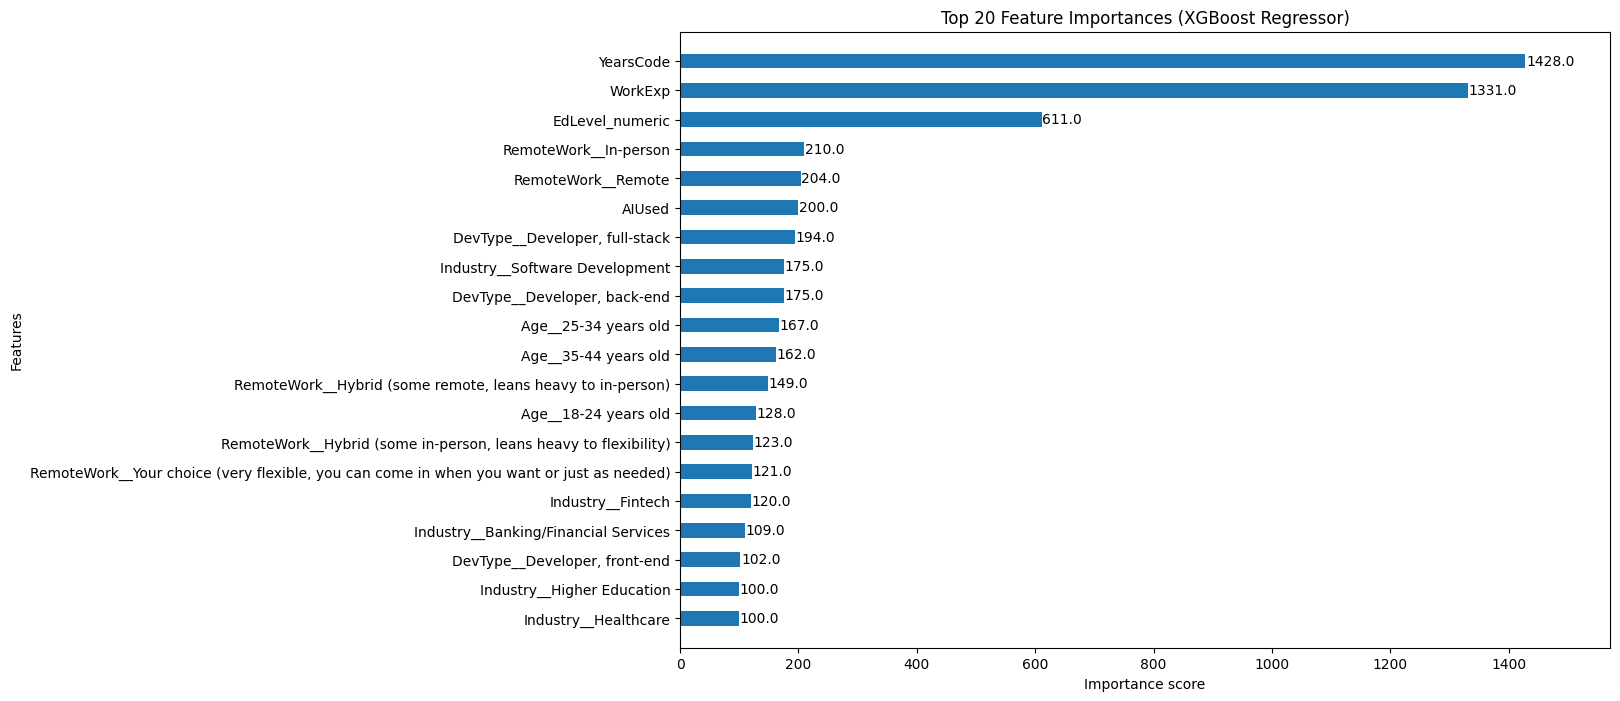

In [76]:
# plot feature importance
fig, ax = plt.subplots(figsize=(12, 8))
plot_importance(best_model, ax = ax, grid=False, max_num_features=20, importance_type='weight', height=0.5)
plt.title('Top 20 Feature Importances (XGBoost Regressor)')
plt.ylabel('Features')
plt.show()